Modelo: Árbol de Decisión
Accuracy: 1.0
Reporte de Clasificación:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       110
        Poor       1.00      1.00      1.00         8

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

Modelo: KNN (k=3)
Accuracy: 1.0
Reporte de Clasificación:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       110
        Poor       1.00      1.00      1.00         8

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

Modelo: Regresión Logística
Accuracy: 1.0
Reporte de Clasificación:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       110
        Poor       1.00      1.00      1.0

C:\Users\cris2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


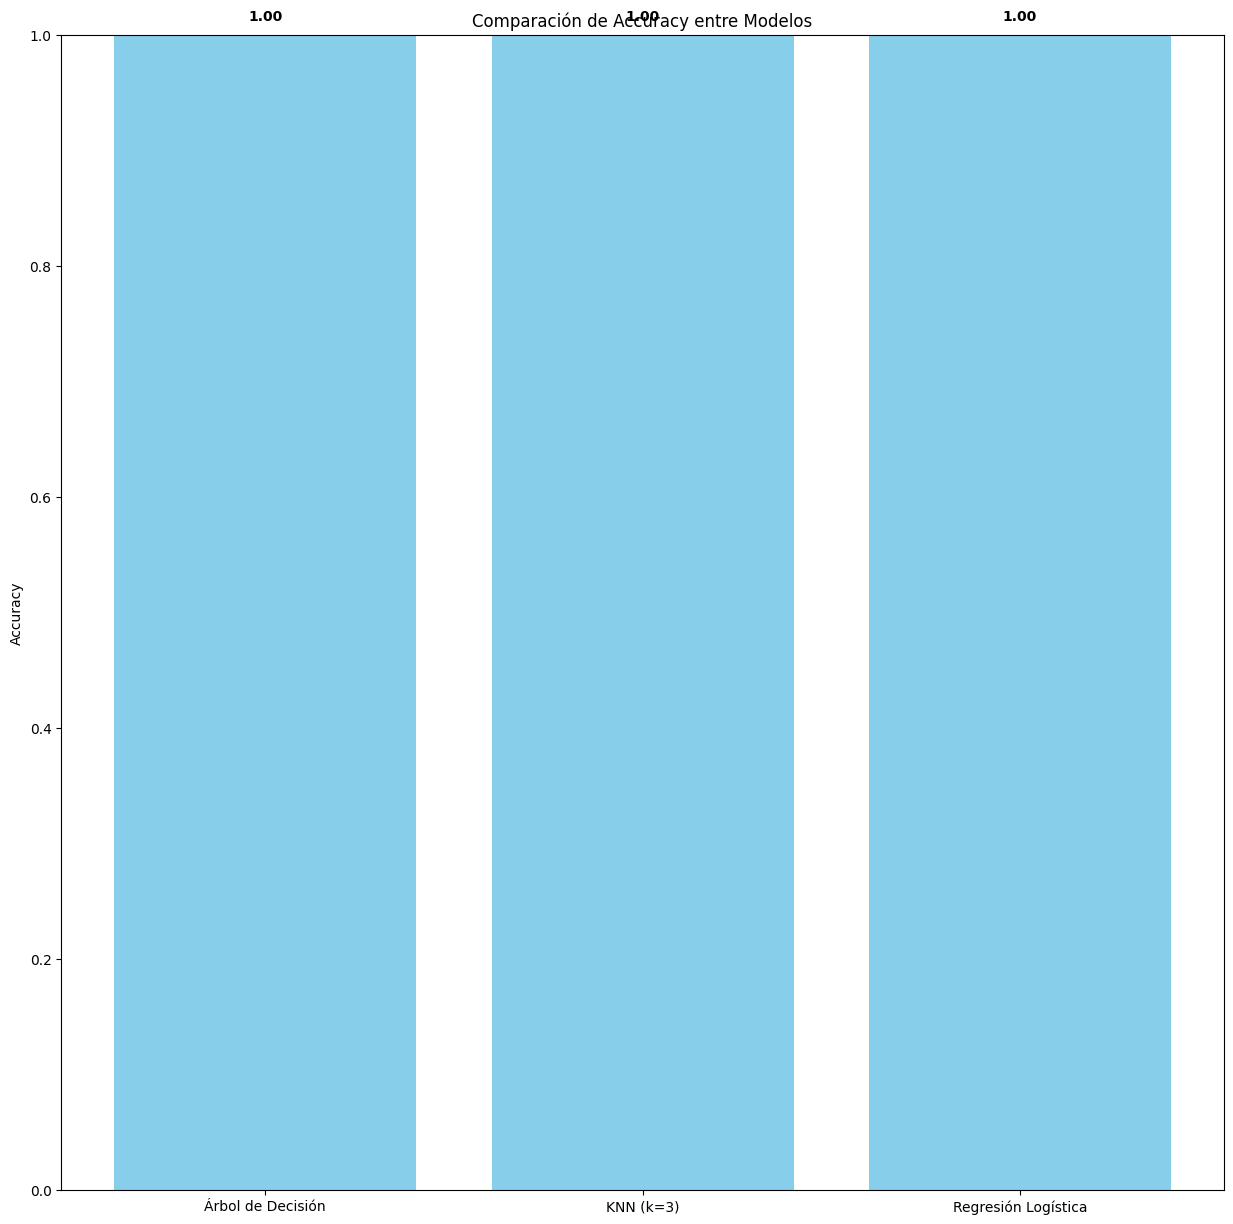

In [19]:
# ==========================
# Evaluación de modelos con OCRDATASET
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# 1. Cargar dataset
df = pd.read_csv("D:\MAXITEL\Escritorio\ginger\MAESTRIA\INTELIGENCIA ARTIFICIAL\proyecto-ml-telecom\Supervisado/ocrdataset.csv")

# 2. Separar características y etiquetas
X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(str).values

# 3. Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
)

# 4. One-hot encoding
X_train_enc = pd.get_dummies(X_train)
X_test_enc = pd.get_dummies(X_test)

# 5. Alinear columnas
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

# 6. Definir modelos
modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "Regresión Logística": LogisticRegression(max_iter=2000, solver="liblinear")
}

    # Impute missing values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
X_train_enc = imputer.fit_transform(X_train_enc)
X_test_enc = imputer.transform(X_test_enc)
# 7. Entrenar y evaluar
resultados = []

for nombre, modelo in modelos.items():

    modelo.fit(X_train_enc, y_train)
    y_pred = modelo.predict(X_test_enc)
    acc = accuracy_score(y_test, y_pred)
    resultados.append({"Modelo": nombre, "Accuracy": acc})

    print("="*50)
    print(f"Modelo: {nombre}")
    print("Accuracy:", acc)
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# 8. Tabla comparativa
resultados_df = pd.DataFrame(resultados)
print("\n\nResumen comparativo de accuracy:")
print(resultados_df)

# 9. Gráfico comparativo con etiquetas
plt.figure(figsize=(15,15))
bars = plt.bar(resultados_df["Modelo"], resultados_df["Accuracy"], color="skyblue")
plt.title("Comparación de Accuracy entre Modelos")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Añadir etiquetas encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()
